# Importing libraries and reading in file

In [1]:
from pyspark import sql
from Library.ProcessData import read_data, sample_data, vectorize_data
from Library.BuildModels import model_logistic_regression, plot_logistic_regression, train_test_split

if __name__ == "__main__":
    spark = sql.SparkSession.builder.appName("Detecting-Malicious-URL App").getOrCreate()

# Read input data

In [2]:
data_df = read_data(spark)
data_df.groupby('label').count().toPandas()

label  count
0   goz      1
1     0  81261
2  None      2
3     1  52664

# Data sampling

In [3]:
sampled = sample_data(data_df)
sampled.groupby('label').count().toPandas()

label  count
0      1  52664
1      0  52583

# Data Ingestion and Vectorization

In [4]:
dataset, pipelineFit = vectorize_data(sampled)
print("\nTotal Dataset Count: " + str(dataset.count()))


Total Dataset Count: 105247


# Splitting of data

In [5]:
trainingData, testData = train_test_split(dataset)
print("\nTraining Dataset Count: " + str(trainingData.count()))
print("Test Dataset Count: " + str(testData.count()))


Training Dataset Count: 84193
Test Dataset Count: 21054


# build LOGISTIC REGRESSION

In [6]:
tp, tn, fp, fn, r, p, a, f1, lrModel, predictions = model_logistic_regression(sampled, trainingData, testData, pipelineFit)
print("\nTrue Positives: %g" % tp)
print("True Negative: %g" % tn)
print("False Positive: %g" % fp)
print("False Negative: %g" % fn)
print("\nAccuracy: %g" %(a*100))
print("F-Score: %f1" %(f1*100))
print("Recall: %g" %(r*100))
print("Precision: %g" %(p*100))


True Positives: 10000
True Negative: 9315
False Positive: 1208
False Negative: 531

Accuracy: 91.7403
F-Score: 92.0005521
Recall: 94.9577
Precision: 89.222


# Plot LOGISTIC REGRESSION

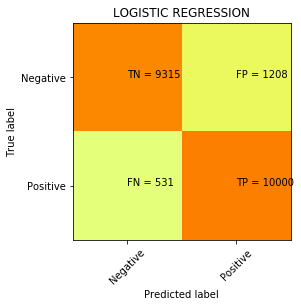

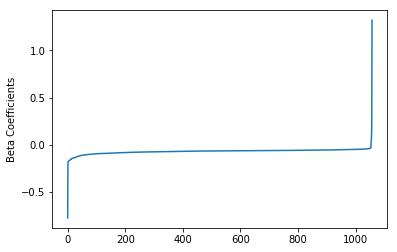

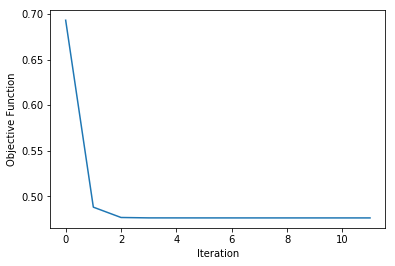

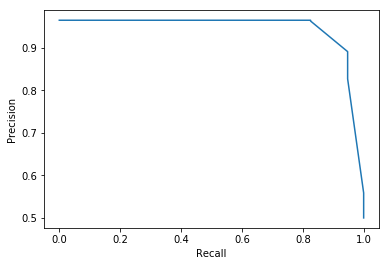

areaUnderROC: 0.9523102715435945


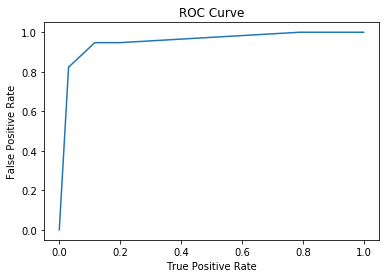

+---------------+---------------+
|      threshold|      F-Measure|
+---------------+---------------+
|0.6078174361...|0.8895510172...|
|0.5753910105...|0.8887781568...|
|0.4974956781...|0.9181666570...|
|0.3997850292...|0.9170486266...|
|0.3755468142...|0.9160489293...|
|0.3608389597...|0.9151248366...|
|0.3475701001...|0.9141188594...|
|0.3335557849...|0.9109789914...|
|0.3101415064...|0.9063454398...|
|0.2947134658...|0.8829677804...|
+---------------+---------------+
only showing top 10 rows



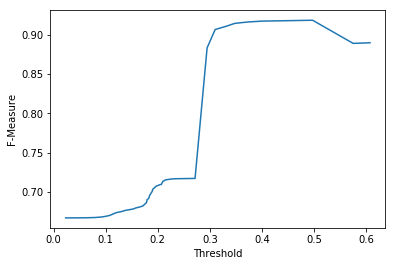

In [7]:
plot_logistic_regression(testData, lrModel)

# Prediction

In [8]:
predictions.filter(predictions['prediction'] == 0) \
    .select("url", "label","prediction") \
    .orderBy("probability", ascending=False) \
    .show(n = 10, truncate = 80)

+---------------------------------+-----+----------+
|                              url|label|prediction|
+---------------------------------+-----+----------+
|social-media-online-marketing.com|    0|       0.0|
|              jobs-to-careers.com|    0|       0.0|
|      business-directory-uk.co.uk|    0|       0.0|
|                   profi-forex.by|    0|       0.0|
|          project-free-upload.com|    0|       0.0|
|                      ms-ad-g.com|    0|       0.0|
|                      c-and-a.com|    0|       0.0|
|                     seo-profi.pl|    0|       0.0|
|                    a-price.co.jp|    0|       0.0|
|      shopping-site-directory.com|    0|       0.0|
+---------------------------------+-----+----------+
only showing top 10 rows

